    Code du dÃ©partement           LibellÃ© du dÃ©partement  Inscrits  \
0                     01                                Ain    438109   
1                     02                              Aisne    373544   
2                     03                             Allier    249991   
3                     04            Alpes-de-Haute-Provence    128075   
4                     05                       Hautes-Alpes    113519   
..                   ...                                ...       ...   
102                   ZP              PolynÃ©sie franÃ§aise    205576   
103                   ZS           Saint-Pierre-et-Miquelon      5045   
104                   ZW                   Wallis et Futuna      9528   
105                   ZX     Saint-Martin/Saint-BarthÃ©lemy     24414   
106                   ZZ  FranÃ§ais Ã©tablis hors de France   1435746   

     Abstentions   Votants  Blancs    Nuls  ExprimÃ©s Sexe      Nom  ...  \
0        97541.0  340568.0  5641.0  1903.0   33

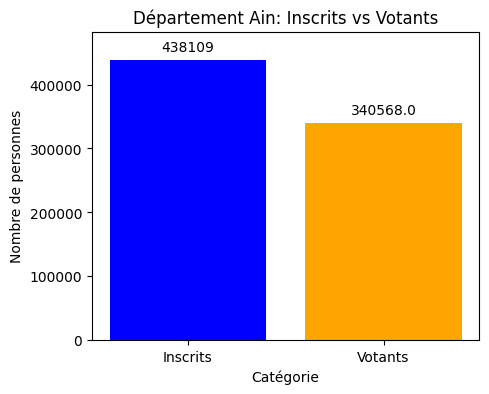

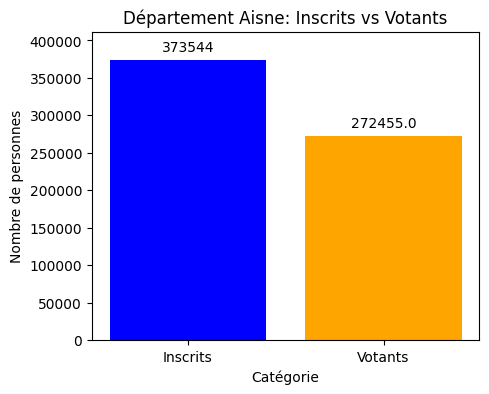

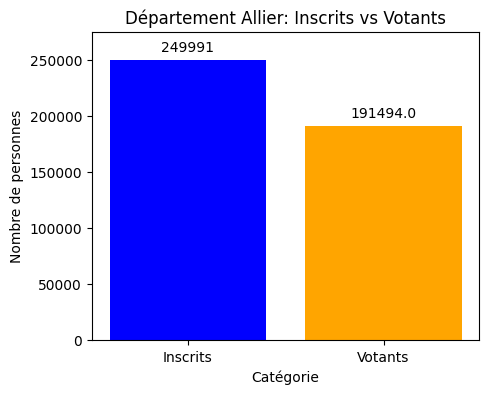

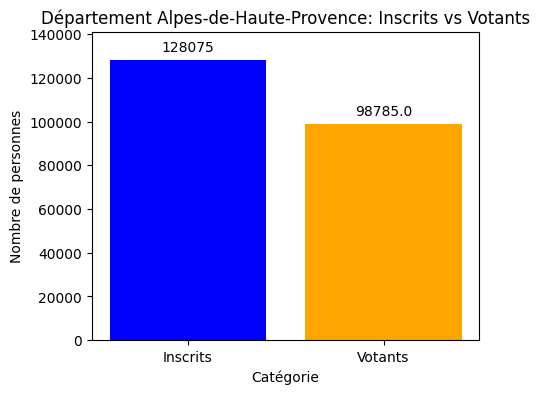

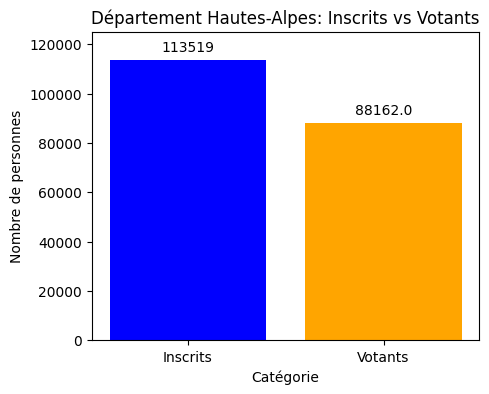

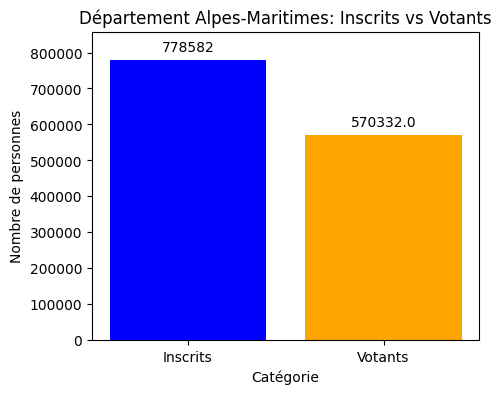

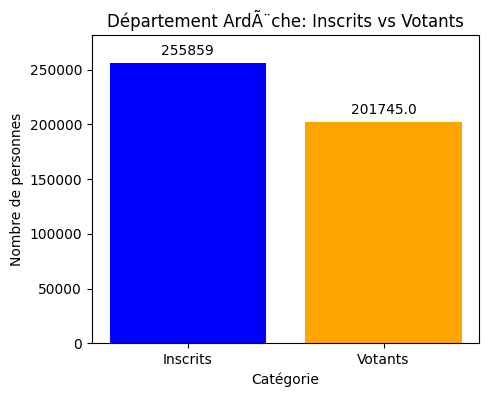

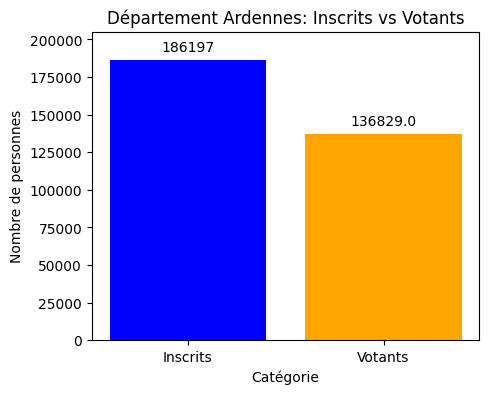

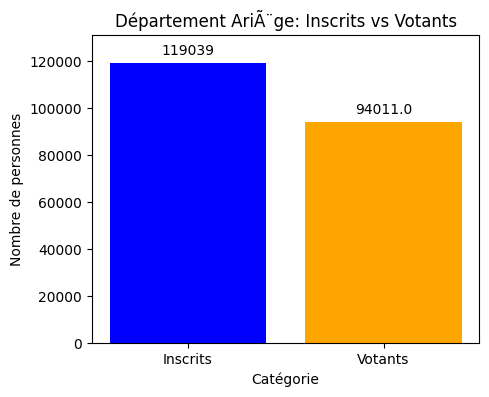

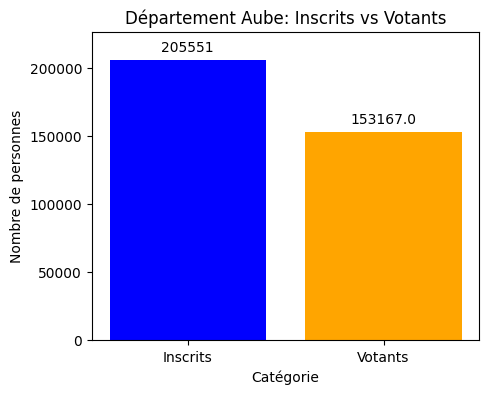

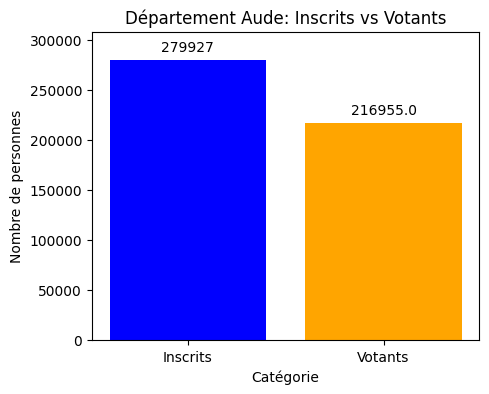

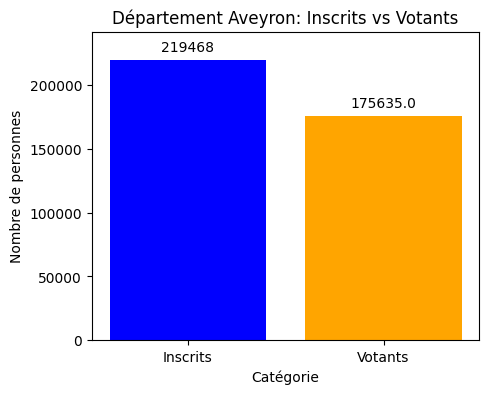

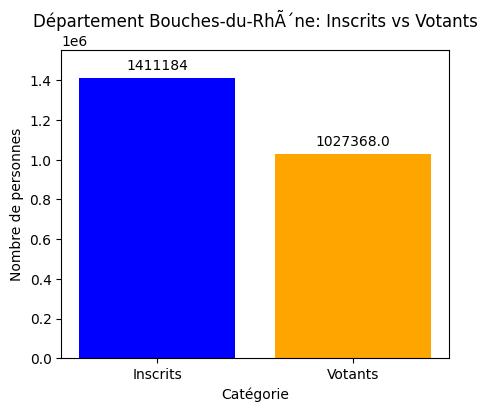

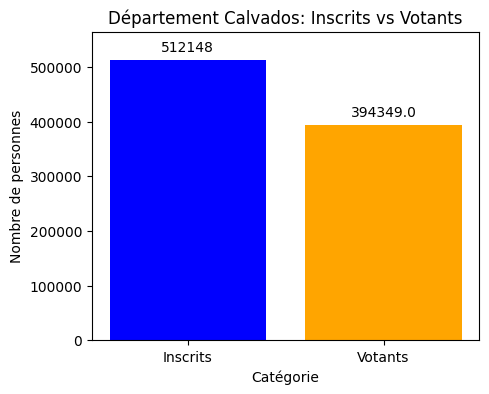

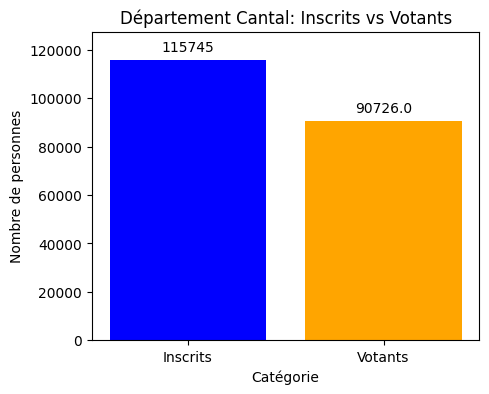

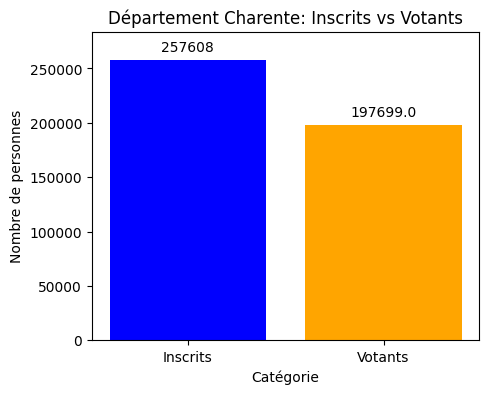

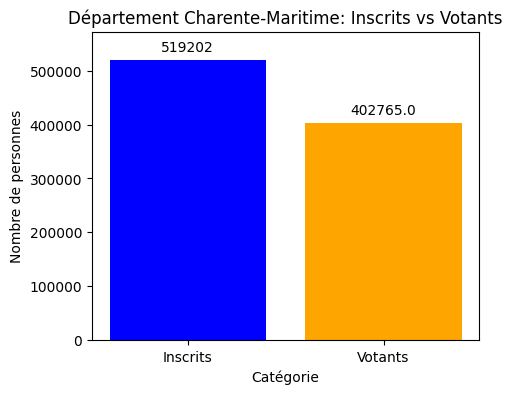

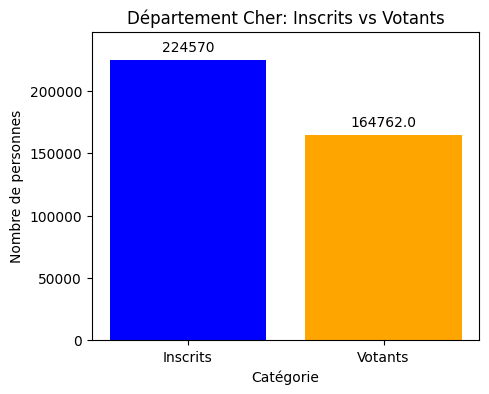

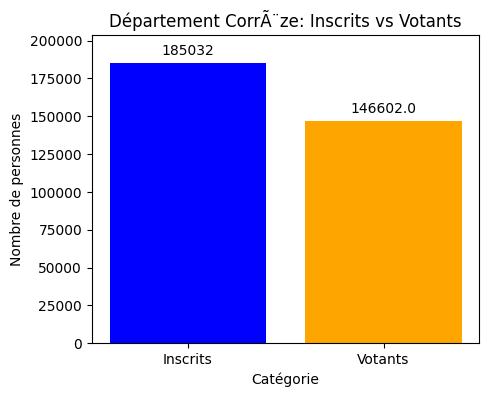

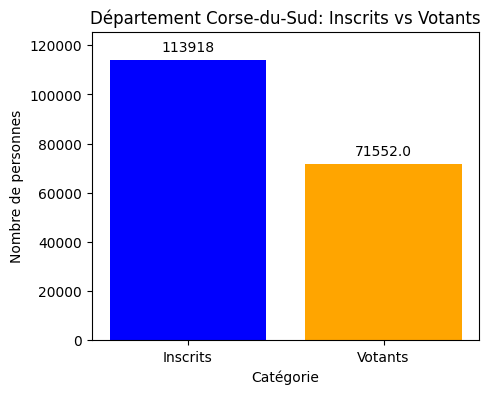

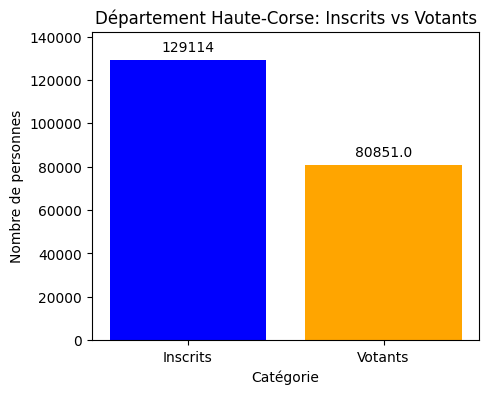

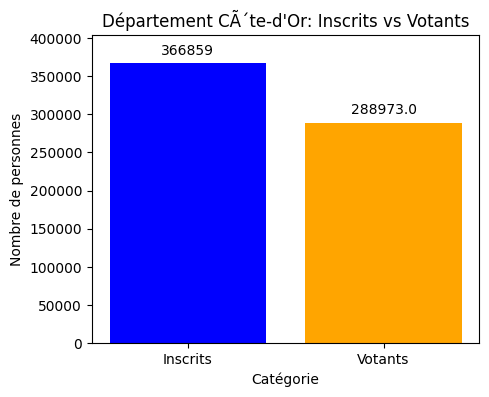

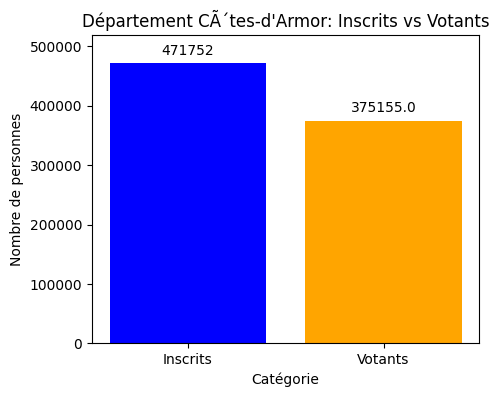

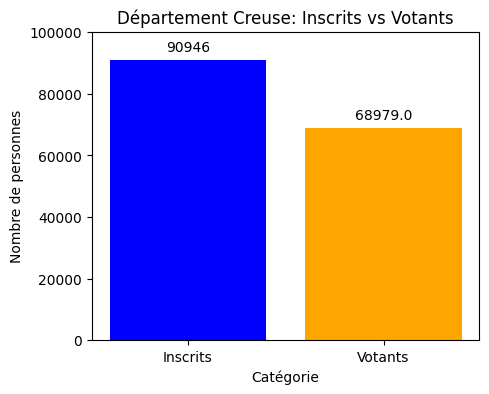

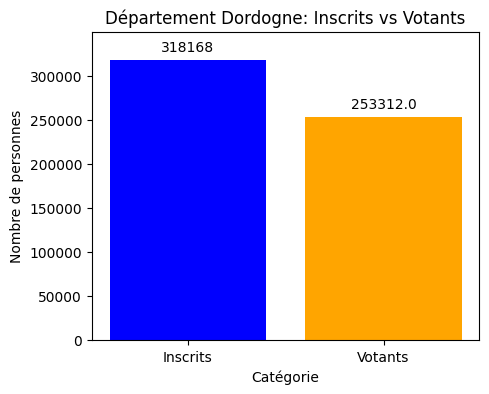

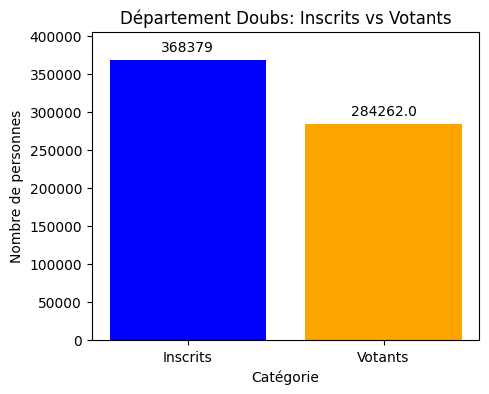

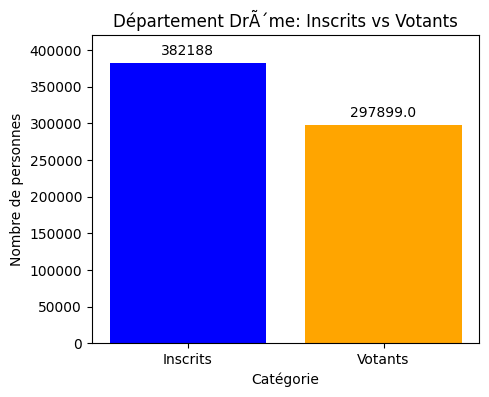

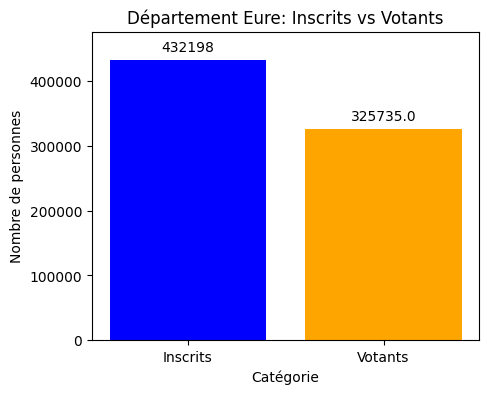

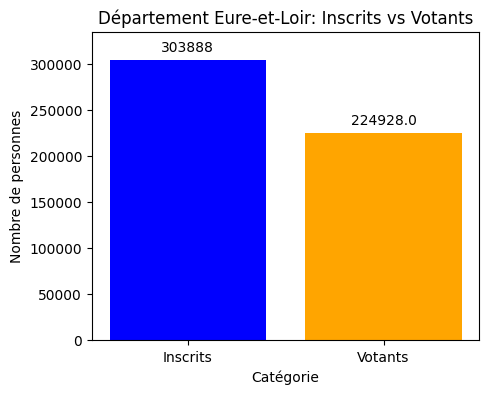

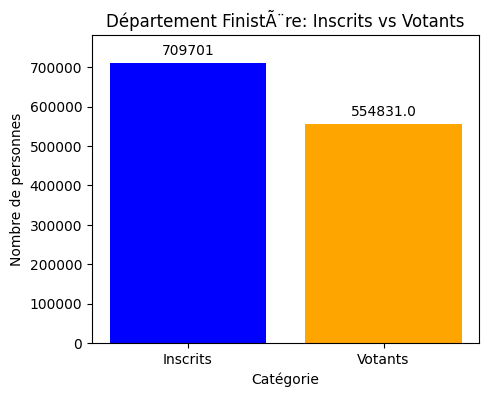

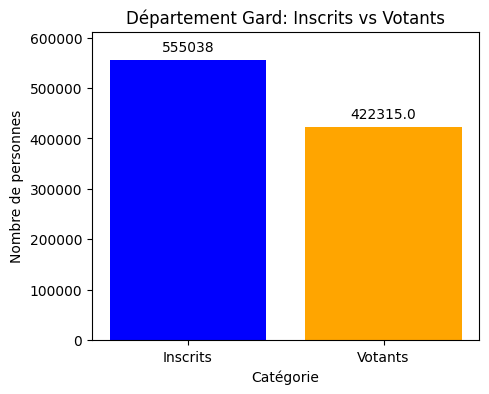

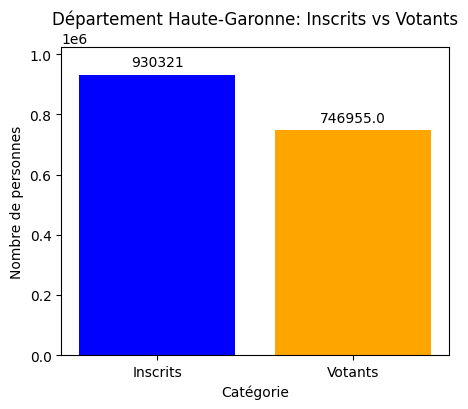

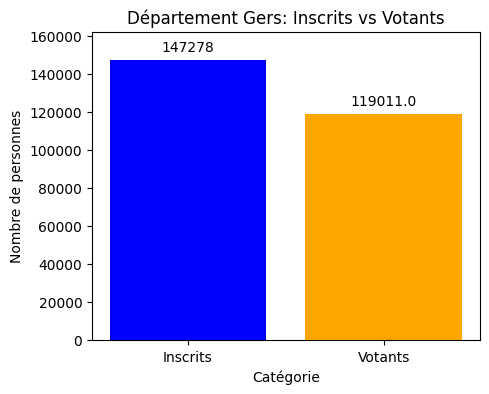

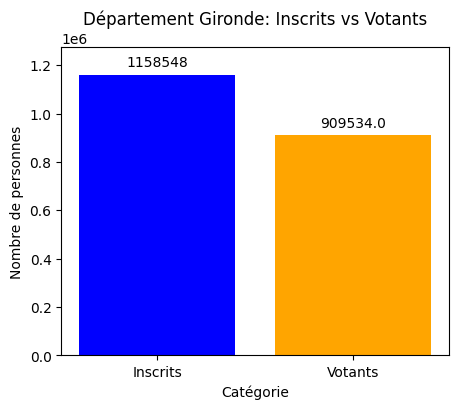

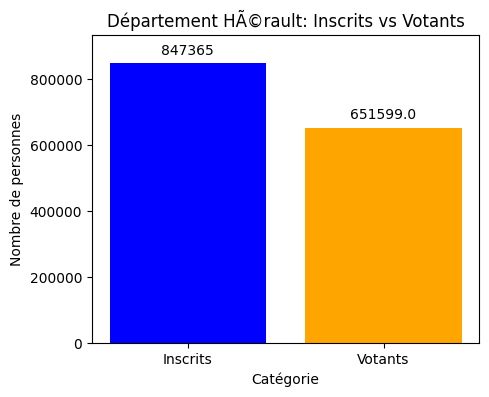

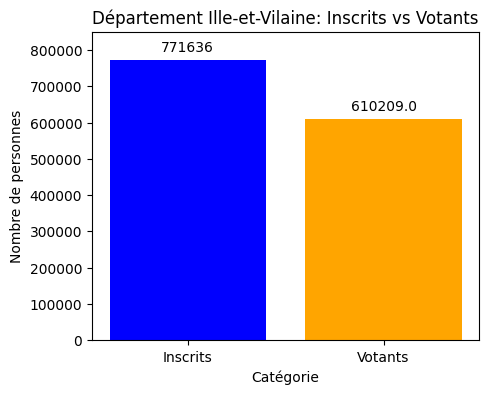

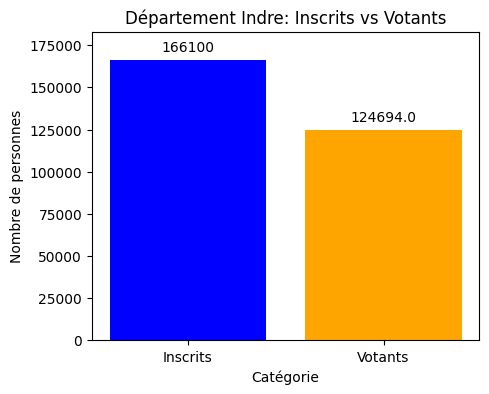

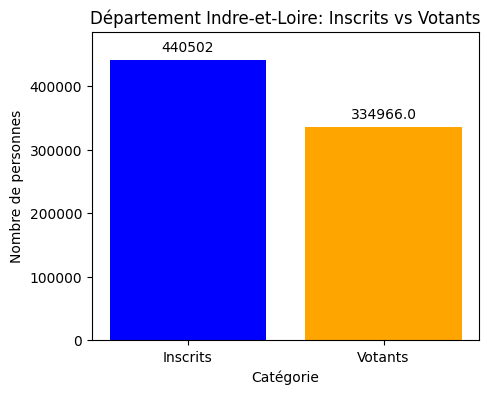

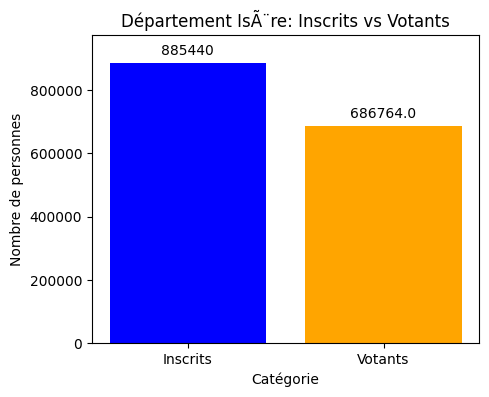

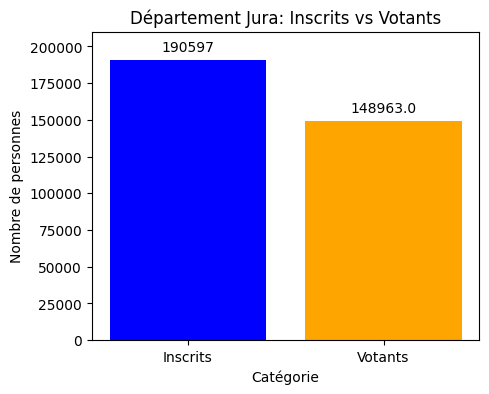

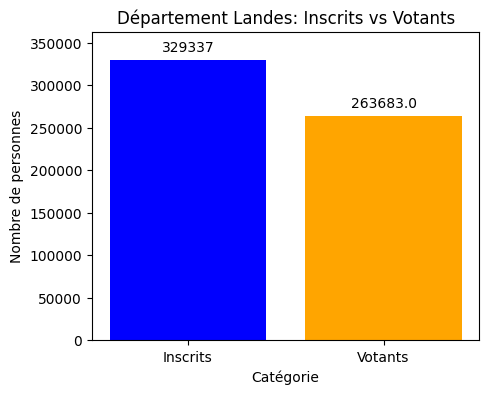

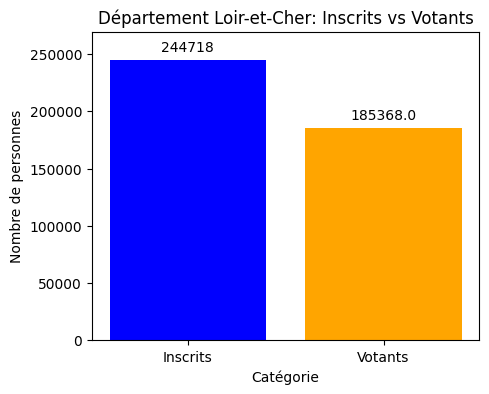

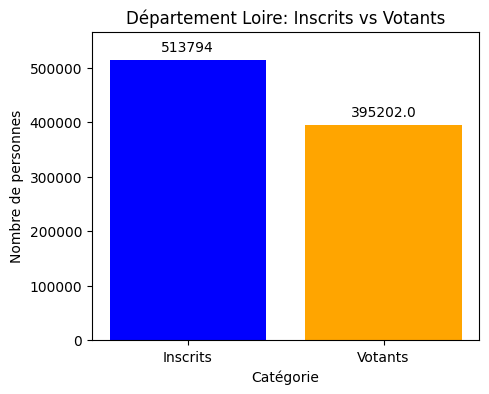

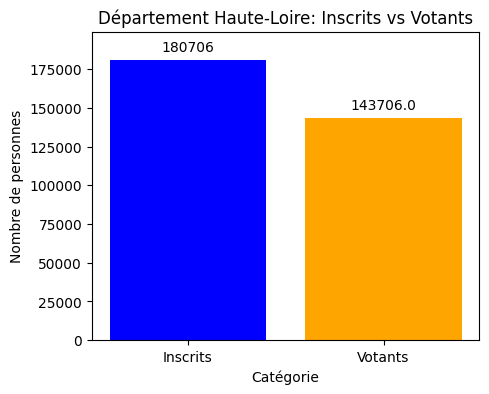

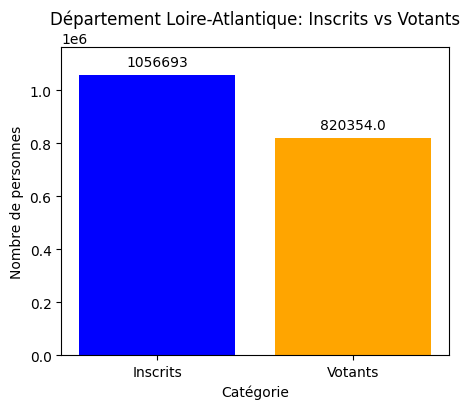

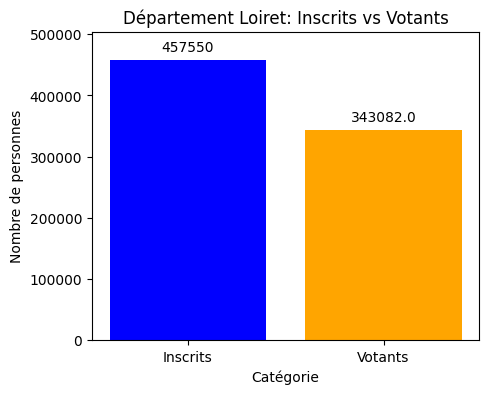

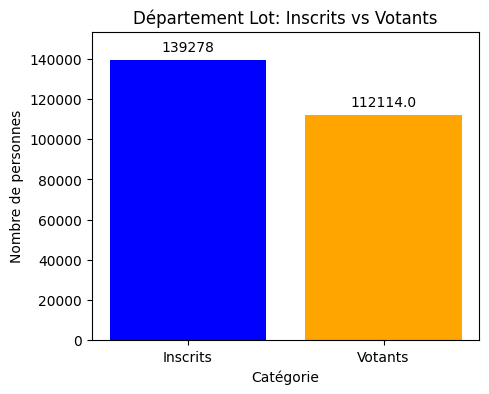

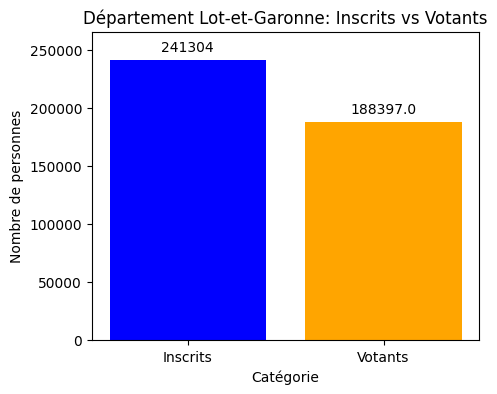

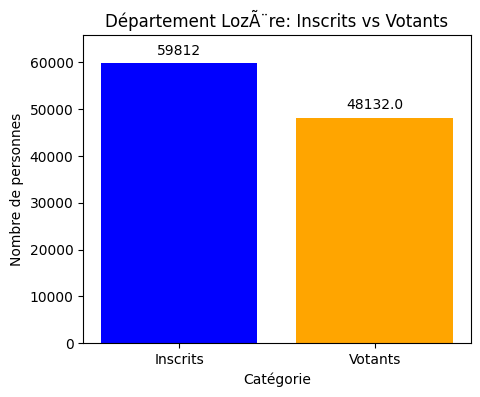

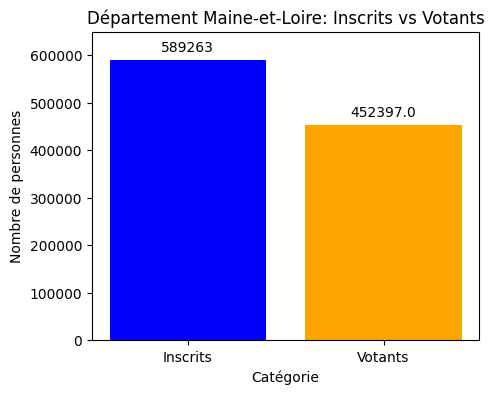

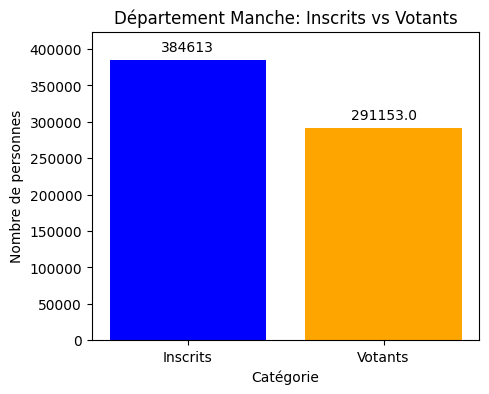

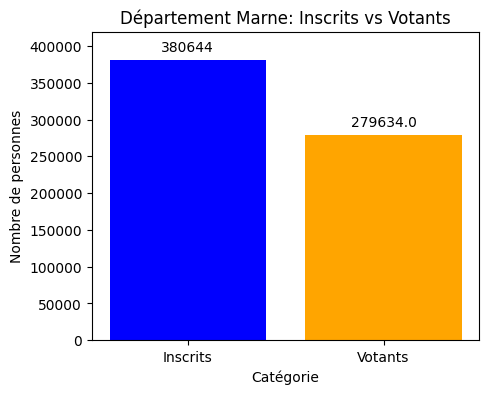

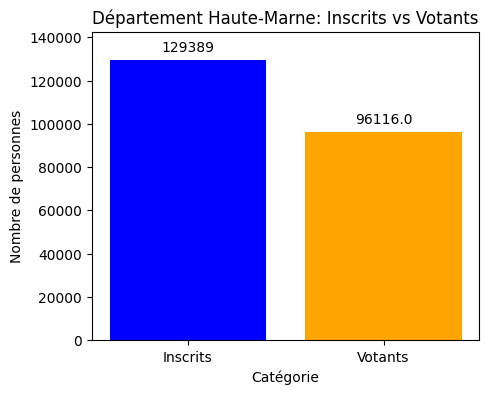

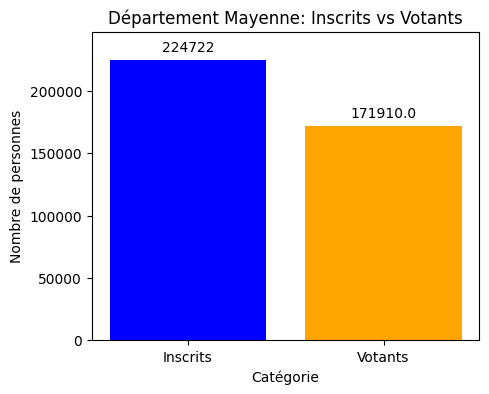

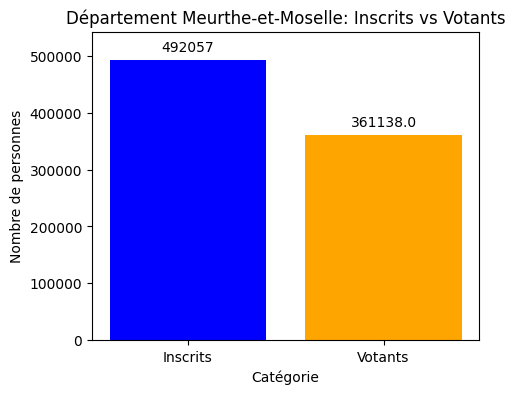

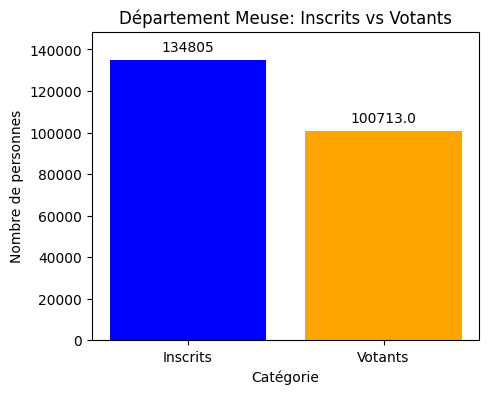

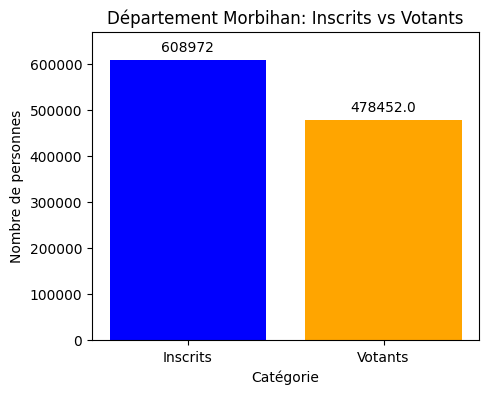

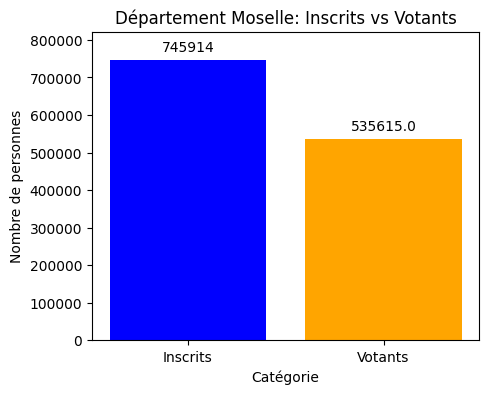

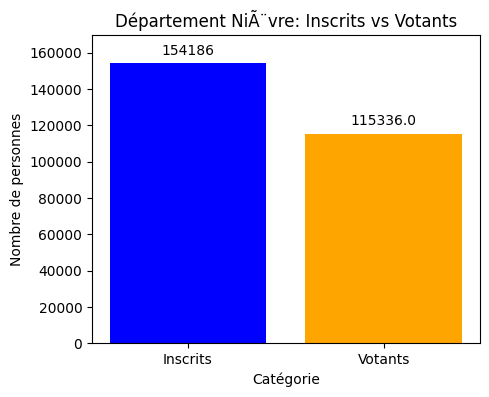

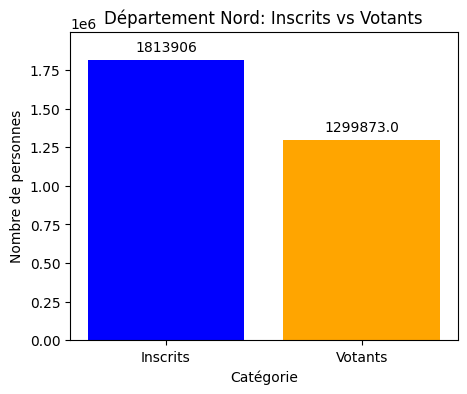

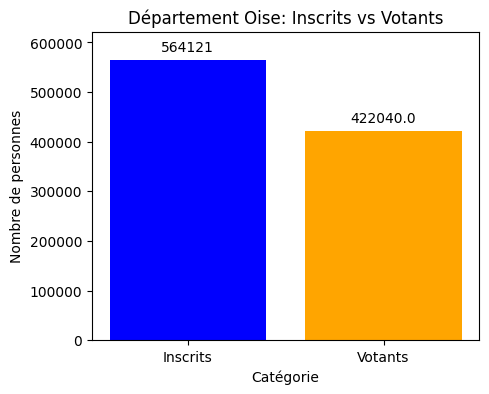

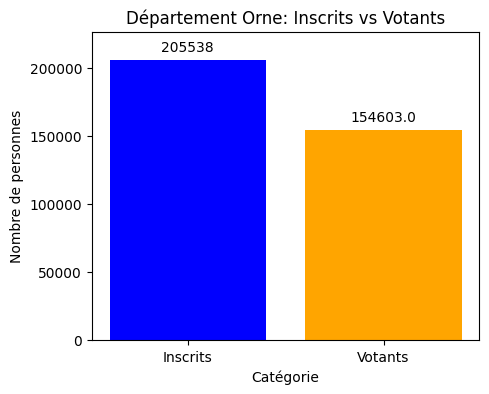

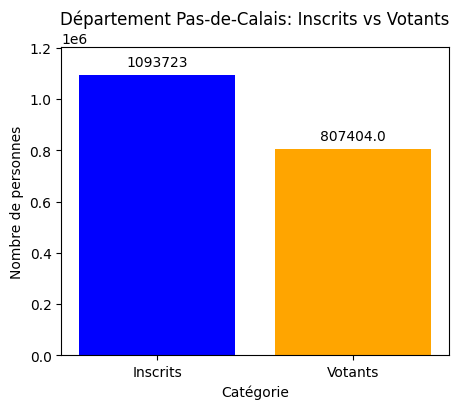

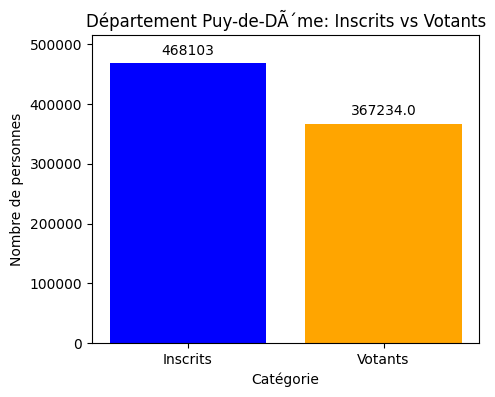

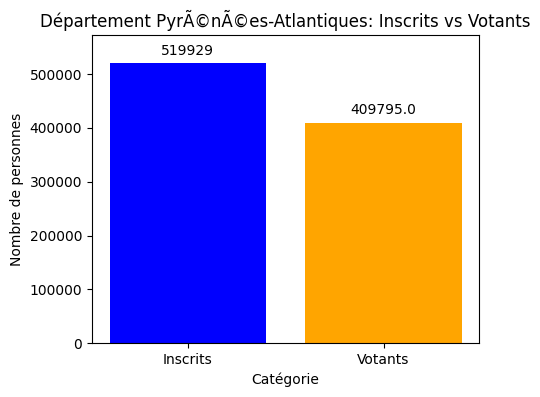

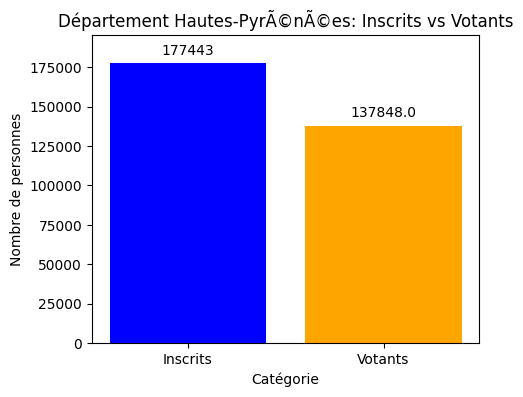

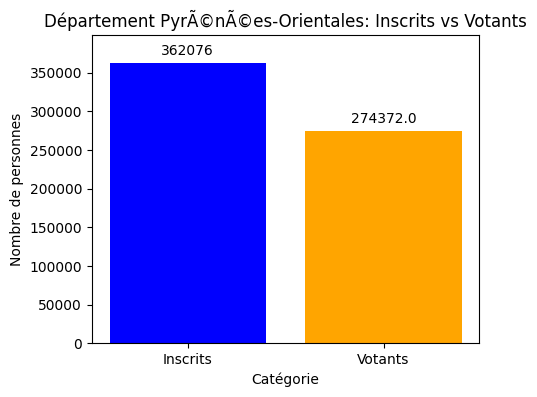

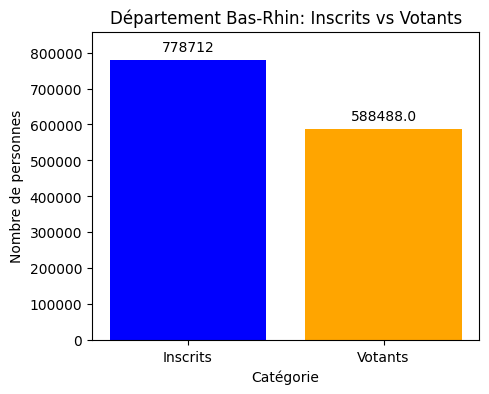

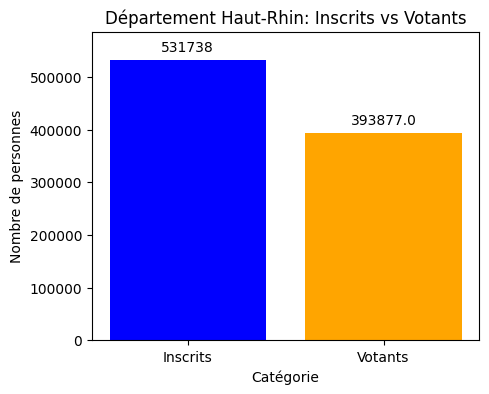

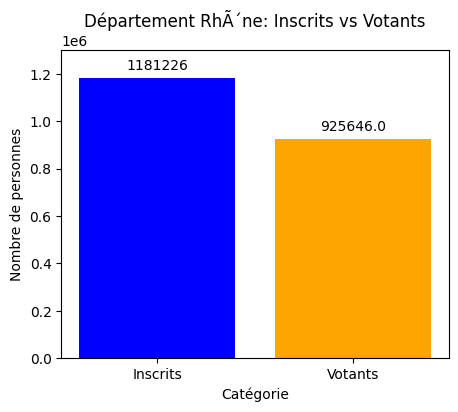

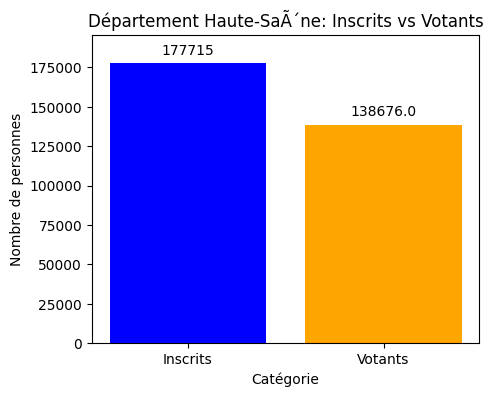

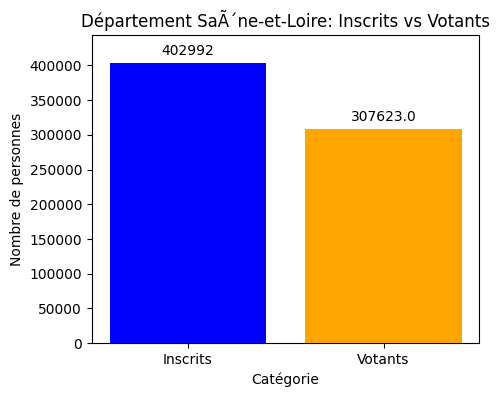

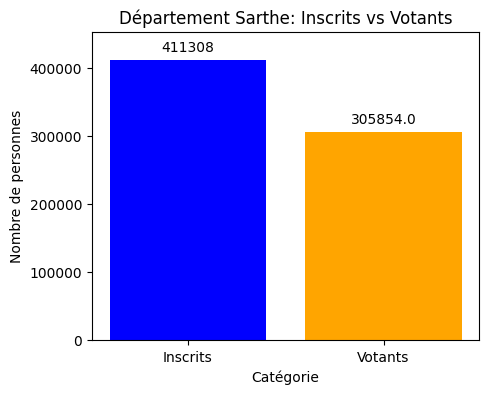

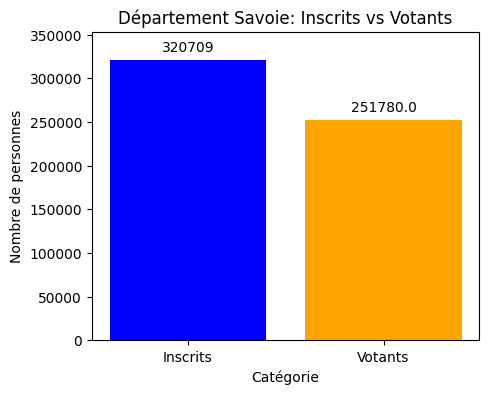

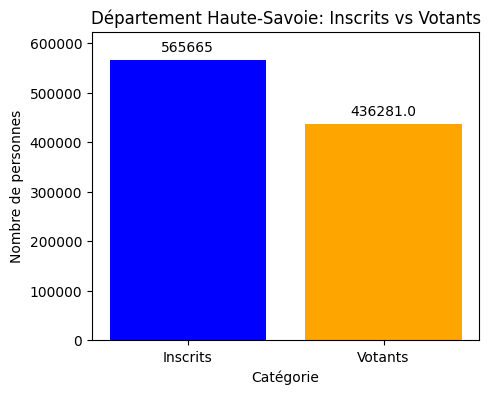

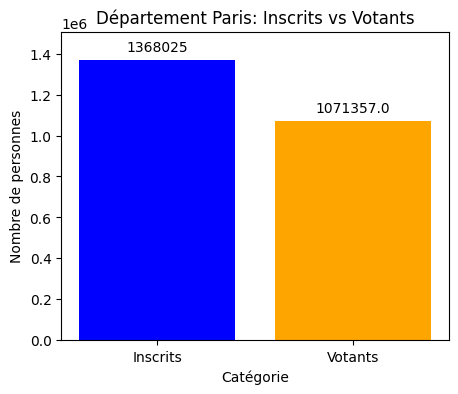

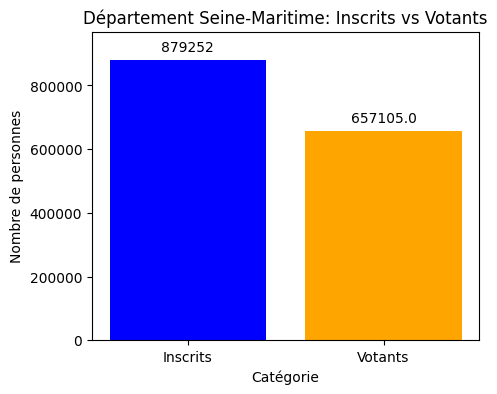

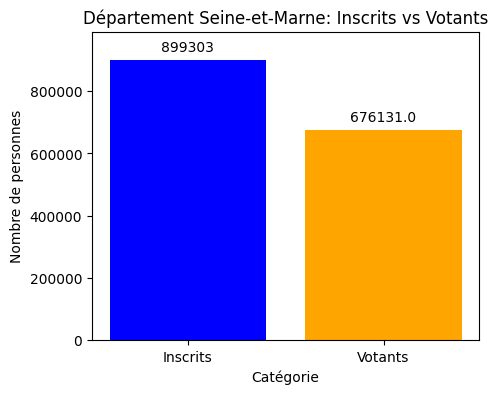

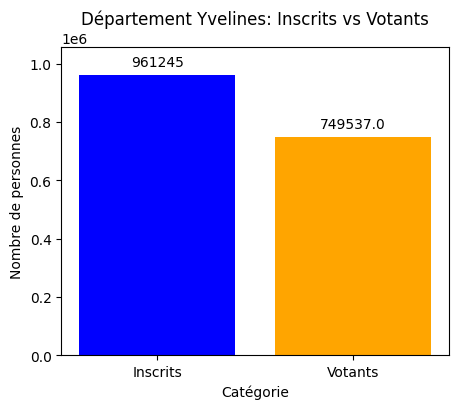

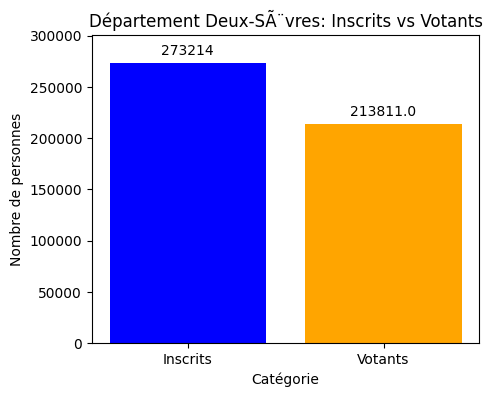

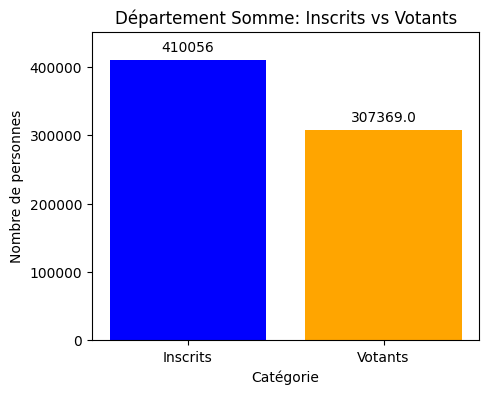

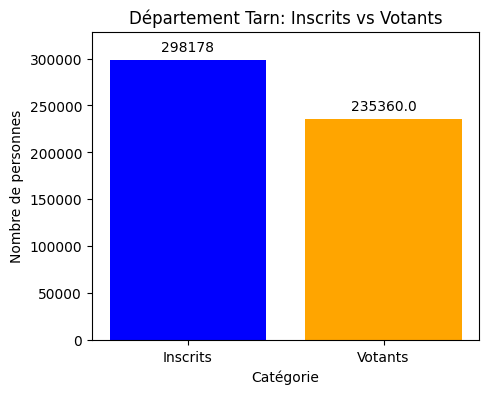

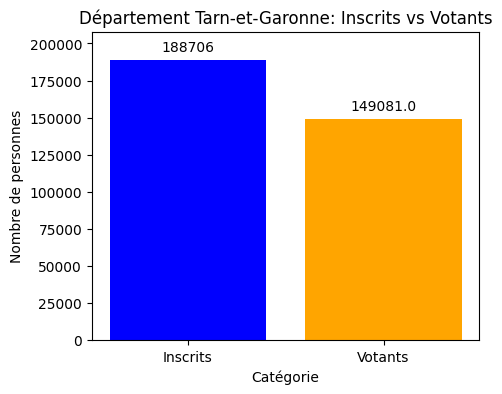

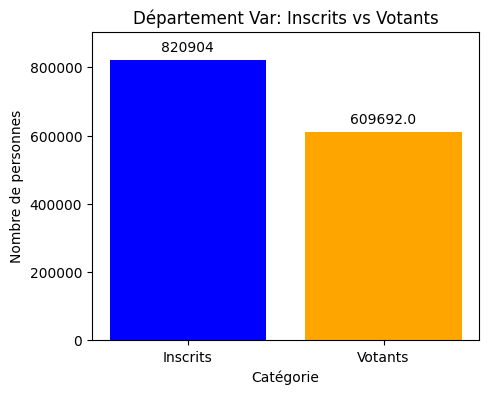

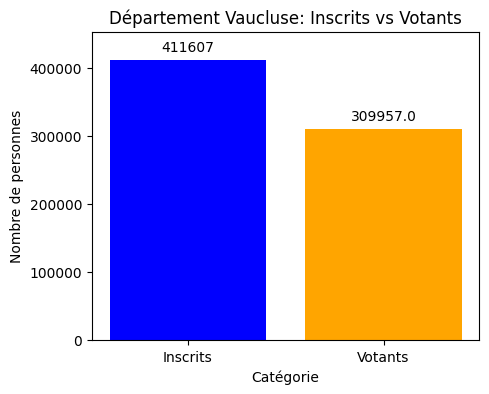

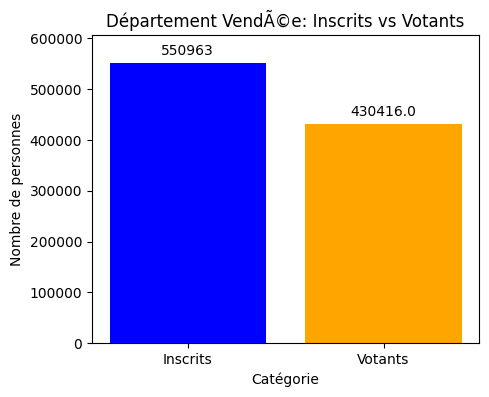

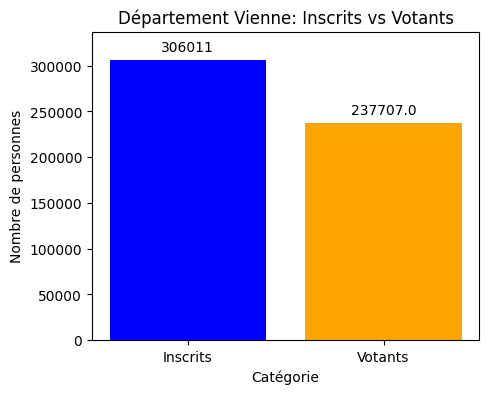

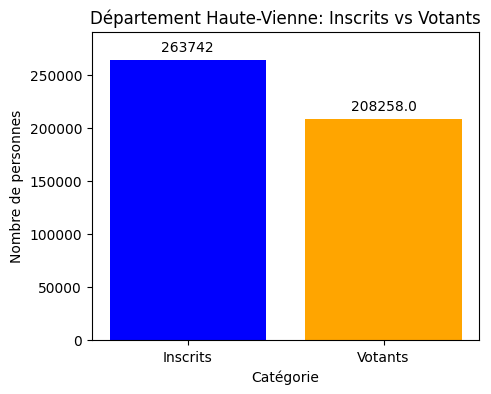

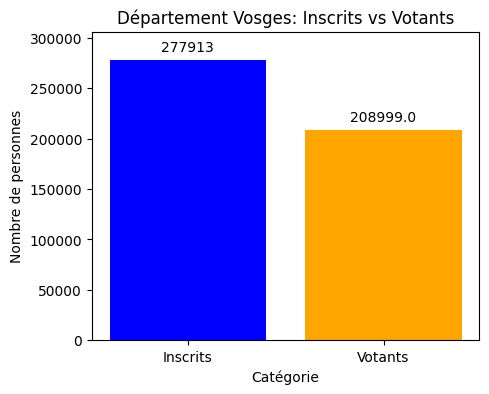

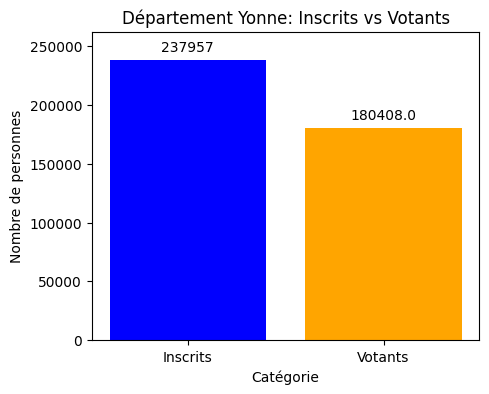

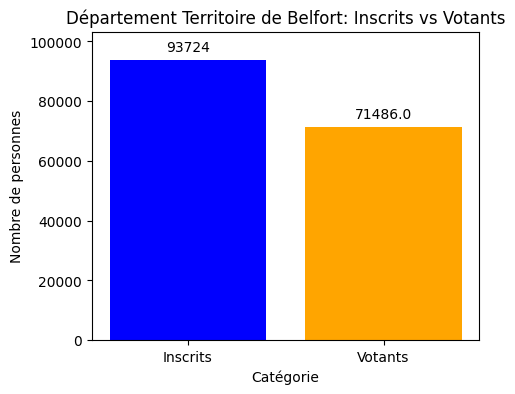

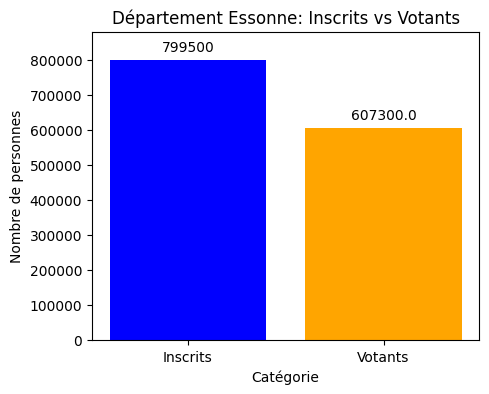

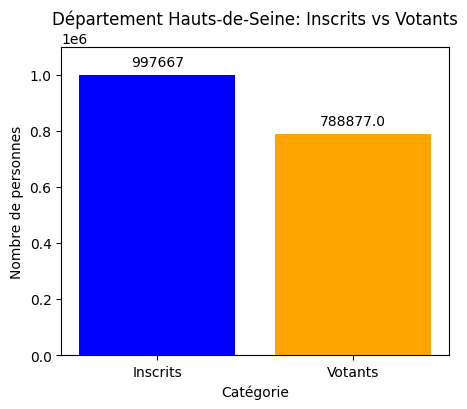

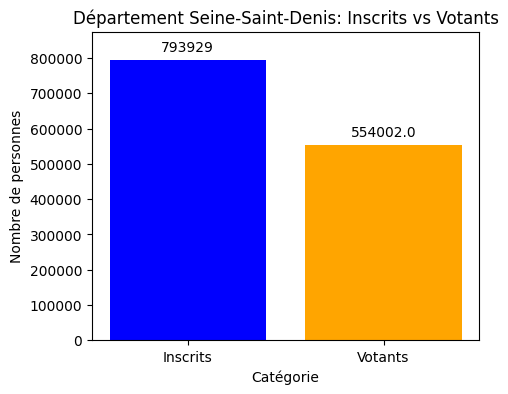

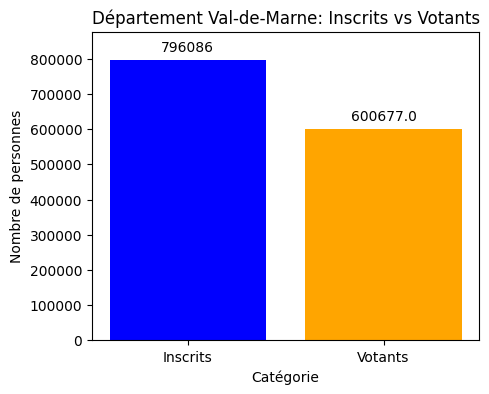

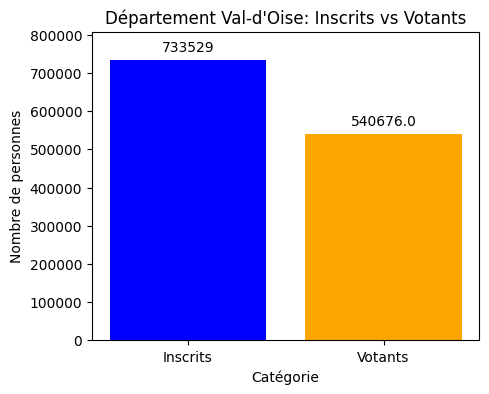

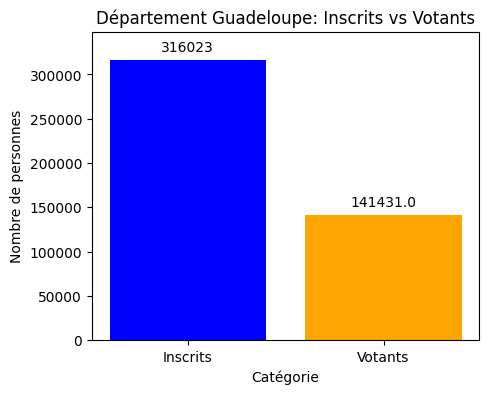

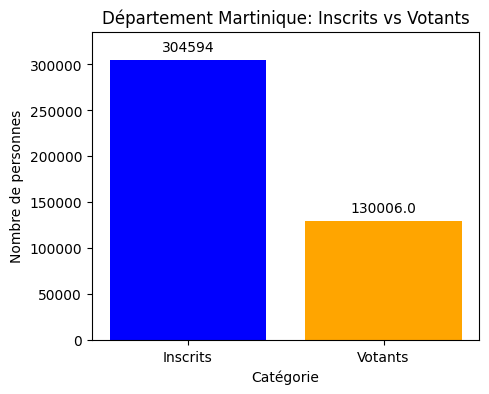

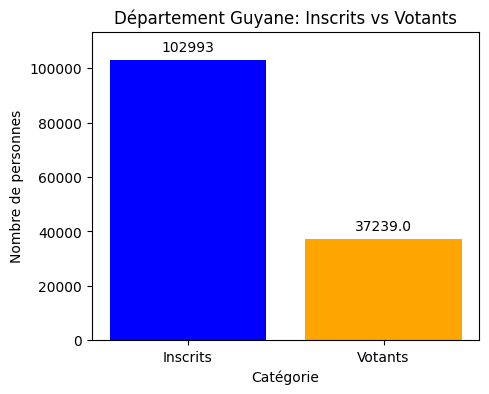

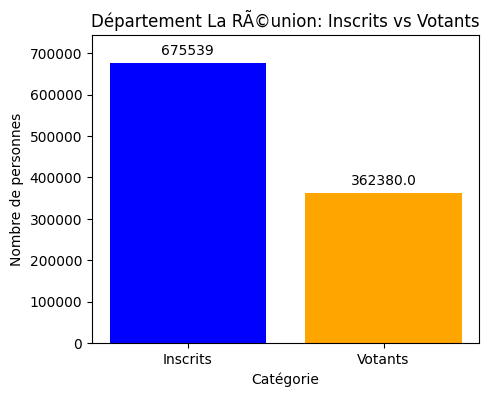

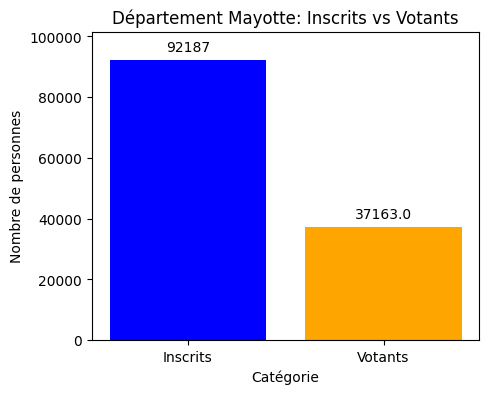

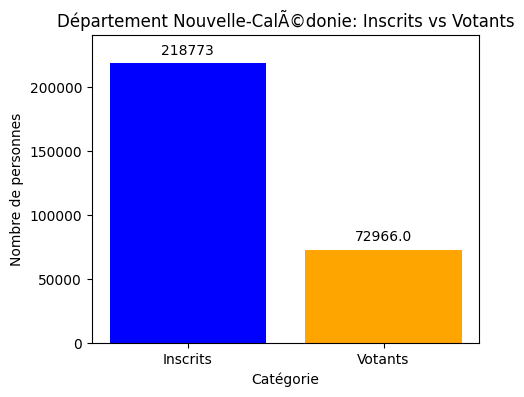

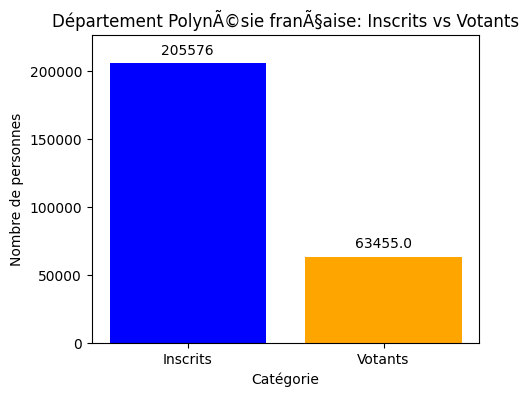

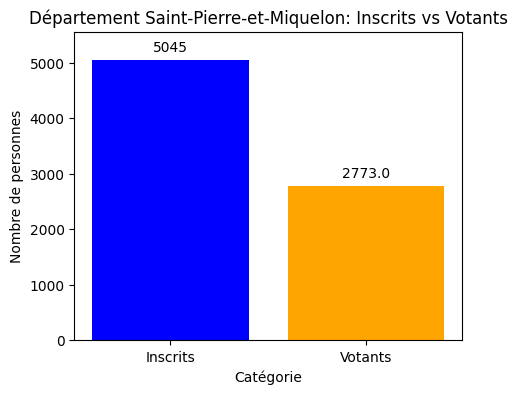

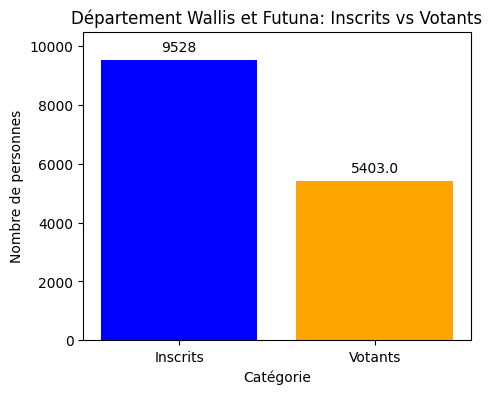

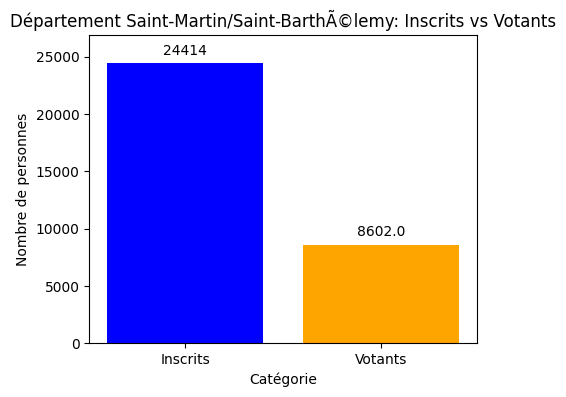

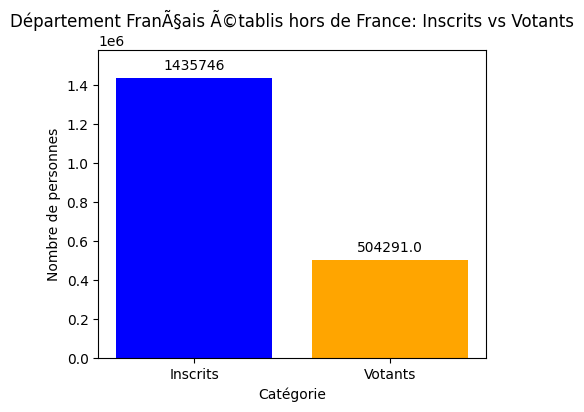

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# read csv file from file path 
with open('c:/Users/stell/Downloads/resultats-elections-presidentielles-2022-1er-tour.csv') as file:
    contenu = pd.read_csv(file)

# Question 5
# Afficher le DataFrame
contenu = pd.DataFrame(contenu)
print(contenu)

# Question 6
# Nombre de ligne
nb_ligne = len(contenu)
# Nombre de colonnes 
nb_colonnes = len(contenu.columns)

print("Nombre de lignes:", nb_ligne)
print("Nombre de colonnes:", nb_colonnes)

# Question 7
# Afficher le type de chaque colonne
print("\nTypes de chaque colonne:")
print(contenu.dtypes)

# Question 8
# Afficher le nom des colonnes 
print("\nNoms des colonnes:")
print(contenu.columns)

# Question 10
# Liste pour stocker la somme de chaque colonne
somme_colonnes = []

# Question 11
# Boucle sur chaque colonne
for colonne in contenu.columns:
    # Calculer la somme si la colonne est quantitative
    if contenu[colonne].dtype in ['int64', 'float64']:
        somme = contenu[colonne].sum()
        somme_colonnes.append((colonne, somme))

# Afficher la liste des sommes des colonnes quantitatives
print("\nSomme des colonnes quantitatives:")
for colonne, somme in somme_colonnes:
    print(f"{colonne}: {somme}")

#Noms de colonnes dans le diagramme
Libellé_du_département = 'Libellé du dépatement'
Inscrits = 'Inscrits'
Votants = 'Votants'

# Boucle sur chaque département
for dept in contenu['LibellÃ© du dÃ©partement'].unique():
    # Filtrer les données pour le département actuel
    dept_data = contenu[contenu['LibellÃ© du dÃ©partement'] == dept]
    
    # Extraire les valeurs pour les barres
    total_inscrits = dept_data[Inscrits].sum()
    total_votants = dept_data[Votants].sum()

    # Créer le diagramme en barres
    plt.figure(figsize=(5, 4))
    plt.bar(['Inscrits', 'Votants'], [total_inscrits, total_votants], color=['blue', 'orange'])
    plt.title(f'Département {dept}: Inscrits vs Votants')
    plt.ylabel('Nombre de personnes')
    plt.xlabel('Catégorie')
    plt.ylim(0, max(total_inscrits, total_votants) * 1.1)
    
    # Afficher les valeurs au-dessus des barres
    for i, v in enumerate([total_inscrits, total_votants]):
        plt.text(i, v + (max(total_inscrits, total_votants) * 0.02), str(v), ha='center', va='bottom')
    
    # Afficher le graphique
    plt.show()

# Sauvegarder le diagramme dans un fichier image
plt.savefig('diagramme_{dept}.png')
plt.close()
